# ÖRNEK VERİ SETİ İLE RFM ANALİZİ

## Verinin Okunması ve Ön Çıkarımlar

In [2]:
#gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as figure
import squarify

In [3]:
#verinin python tarafından okunması
dataset = pd.read_excel("online_retail.xlsx")

In [4]:
#veriye ait ilk 5 satır
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#veride null değerlerin hangi kolonda ne kadar miktarda olduğunun bulunması
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#Bu veri kümesinde kaç farklı ürün mevcut?
dataset["Description"].nunique()

4223

In [7]:
#Bu veri kümesinde kaç farklı ülkeden alışveriş bilgisi mevcut?
dataset["Country"].nunique()

38

In [8]:
#Veri setindeki ilk ve son tarihi belirleme

In [9]:
dataset["InvoiceDate"].min()

Timestamp('2010-12-01 08:26:00')

In [10]:
dataset["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [11]:
#verideki satıştaki ürün miktarı bilgisi kaç satırda mevcut (negatif değerleri de içeren)
dataset["Quantity"].count()

541909

## Veri Ön İşleme

In [12]:
#satılan ürün miktarı ve ödenen birim tutarın çarpımı ile toplam tutar değerlerini saklayacak olan TotalPrice sütununun oluşturulması
dataset["TotalPrice"] = dataset["Quantity"]*dataset["UnitPrice"]
dataset["CustomerIDTF"] = dataset["CustomerID"].isnull()
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,CustomerIDTF
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False


In [13]:
#CustomerID bilgisi boş olan veriler üzerinden değerlendirme yapmamak için NaN verileri temizledik ve sıklığı pozitif olan verileri aldık
new_data = dataset[dataset["Quantity"] > 0]
final_data = new_data[new_data["CustomerIDTF"] != True]
final_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,CustomerIDTF
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False


In [14]:
dataset.count()

InvoiceNo       541909
StockCode       541909
Description     540455
Quantity        541909
InvoiceDate     541909
UnitPrice       541909
CustomerID      406829
Country         541909
TotalPrice      541909
CustomerIDTF    541909
dtype: int64

In [15]:
final_data.count()

InvoiceNo       397924
StockCode       397924
Description     397924
Quantity        397924
InvoiceDate     397924
UnitPrice       397924
CustomerID      397924
Country         397924
TotalPrice      397924
CustomerIDTF    397924
dtype: int64

## RFM Tablosu Oluşturma

In [16]:
last_date = final_data["InvoiceDate"].max()

In [17]:
#Verinin customer ID'ye göre gruplanması ve R F M değerlerinin bulunması
rfm_table = final_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (last_date - x.max()), #Recency değerlerini bulma
                                        'InvoiceNo': lambda x: len(x), #Frequency değerlerini bulma
                                        'TotalPrice': lambda x: x.sum()}) #Monetary değerlerini bulma

rfm_table.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'TotalPrice': 'monetary'}, inplace=True)

In [18]:
rfm_table['recency'] = rfm_table['recency'].astype('timedelta64[D]')
rfm_table.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325.0,1,77183.60
12347.0,1.0,182,4310.00
12348.0,74.0,31,1797.24
12349.0,18.0,73,1757.55
12350.0,309.0,17,334.40


In [19]:
#iptal edilen işlem görmezden gelinmeden önceki veri setinde 12346 nolu müşteriye ait 2 işlem vardı.
dataset[dataset["CustomerID"] == 12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,CustomerIDTF
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,False
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6,False


In [20]:
#12346 ID'li müşterinin frequency bilgisinin doğruluğunu kontrol ediyoruz ve iptal işlemini de görmezden geldiğimiz için tek işlem 
#olduğunu görerek frequency'nin doğruluğunu onaylamış oluyoruz.
final_data[final_data["CustomerID"] == 12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,CustomerIDTF
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,False


In [21]:
#müşterilerin hangi segmente ait olduğunu belirlemek için recency,frequency ve monetary değerlerini 1,5 aralğına sıkıştırıp skorladık
rfm_table["recency_score"] = pd.qcut(rfm_table["recency"], 5, labels=[5, 4, 3, 2, 1])
rfm_table["frequency_score"] = pd.qcut(rfm_table["frequency"], 5, labels=[1, 2, 3, 4, 5])
rfm_table["monetary_score"] = pd.qcut(rfm_table["monetary"], 5, labels=[1, 2, 3, 4, 5])

In [22]:
rfm_table.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
12346.0,325.0,1,77183.60,1,1,5
12347.0,1.0,182,4310.00,5,5,5
12348.0,74.0,31,1797.24,2,3,4
12349.0,18.0,73,1757.55,4,4,4
12350.0,309.0,17,334.40,1,2,2


In [23]:
#str tip dönüşümü de yaparak elde edilen parça değerleri yanyana toplayarak total_rfm_score sütununa atıyoruz
rfm_table["total_rfm_score"] = (rfm_table["recency_score"].astype(str) + 
                                rfm_table["frequency_score"].astype(str) + 
                                rfm_table["monetary_score"].astype(str))

In [24]:
rfm_table.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,total_rfm_score
CustomerID,,,,,,,
12346.0,325.0,1,77183.60,1,1,5,115
12347.0,1.0,182,4310.00,5,5,5,555
12348.0,74.0,31,1797.24,2,3,4,234
12349.0,18.0,73,1757.55,4,4,4,444
12350.0,309.0,17,334.40,1,2,2,122


In [25]:
#müşterilerin farklı bölütlere(segmentlere) ayrılması
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Custs',
    r'41': 'Promising',
    r'51': 'New_Custs',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}

In [26]:
rfm_table['segment'] = rfm_table['recency_score'].astype(str) + rfm_table['frequency_score'].astype(str)
rfm_table['segment'] = rfm_table['segment'].replace(seg_map, regex=True)
rfm_table.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,total_rfm_score,segment
CustomerID,,,,,,,,
12346.0,325.0,1,77183.60,1,1,5,115,Hibernating
12347.0,1.0,182,4310.00,5,5,5,555,Champions
12348.0,74.0,31,1797.24,2,3,4,234,At_Risk
12349.0,18.0,73,1757.55,4,4,4,444,Loyal_Custs
12350.0,309.0,17,334.40,1,2,2,122,Hibernating


In [27]:
#R F M değerlerinin ortalamalarına ait yeni bir tablo çıkartılması
segment_exp = rfm_table.groupby('segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
}).round(1)
segment_exp

recency frequency monetary      
                       mean      mean     mean count
segment                                             
About_to_Sleep         52.8      15.9    476.4   326
At_Risk               165.7      56.8    996.2   564
Cant_Loose            145.3     182.3   2393.5    81
Champions               4.9     289.0   6960.9   606
Hibernating           210.2      13.6    530.8  1063
Loyal_Custs            33.0     156.7   2833.5   824
Need_Attention         51.8      41.8    857.2   203
New_Custs               5.8       7.6   3618.7    57
Potential_Loyalists    15.4      34.9    910.5   499
Promising              22.1       7.6    417.5   116

In [28]:
#sütunları kullanabilmek ve düzenli görünmesi için tekrar isimlendiriyoruz
segment_exp.columns = segment_exp.columns.droplevel()
segment_exp.columns = ['recency_mean','frequency_mean','monetary_mean', 'count']
segment_exp

,recency_mean,frequency_mean,monetary_mean,count
segment,,,,
About_to_Sleep,52.8,15.9,476.4,326
At_Risk,165.7,56.8,996.2,564
Cant_Loose,145.3,182.3,2393.5,81
Champions,4.9,289.0,6960.9,606
Hibernating,210.2,13.6,530.8,1063
Loyal_Custs,33.0,156.7,2833.5,824
Need_Attention,51.8,41.8,857.2,203
New_Custs,5.8,7.6,3618.7,57
Potential_Loyalists,15.4,34.9,910.5,499


## RFM Bölütlerinin Görselleştirilmesi

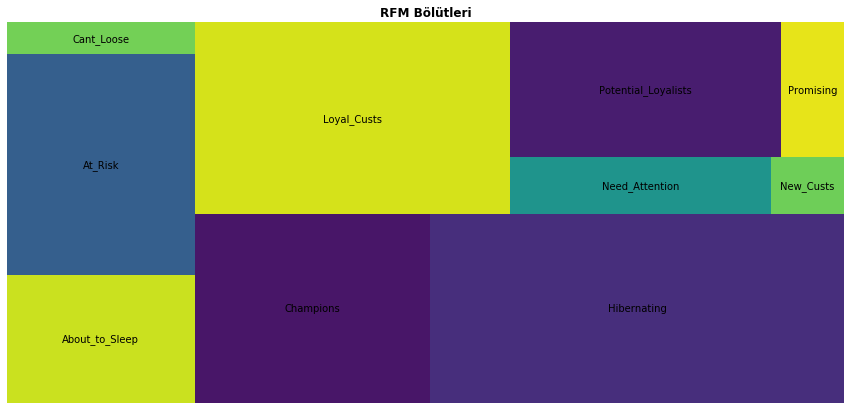

In [29]:
figure = plt.gcf()
axis = figure.add_subplot()
figure.set_size_inches(15,7)
squarify.plot(sizes=segment_exp['count'], 
              label=['About_to_Sleep',
                     'At_Risk',
                     'Cant_Loose',
                     'Champions',
                     'Hibernating',
                     'Loyal_Custs', 
                     'Need_Attention', 
                     'New_Custs',
                     'Potential_Loyalists',
                     'Promising'])
plt.title("RFM Bölütleri",fontsize=12,fontweight="bold")
plt.axis('off')
plt.show()

# Bazı Bölütler ve Müşteriler için Yorumlarım

In [35]:
rfm_table[rfm_table['segment'] == 'Champions'].head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,total_rfm_score,segment
CustomerID,,,,,,,,
12347.0,1.0,182,4310.00,5,5,5,555,Champions
12362.0,2.0,266,5226.23,5,5,5,555,Champions
12364.0,7.0,85,1313.10,5,4,4,544,Champions
12381.0,4.0,87,1845.31,5,4,4,544,Champions
12417.0,2.0,192,3649.10,5,5,5,555,Champions


**Champions:** Sık sık satın alım,yüksek miktarda harcama yapan kaybedilmemesi gerekn müşterilerdir. Bu müşteriler için farklı kampanyalar yapılarak potansiyelin kaybı önlenebilir. Yeni çıkan herhangi bir kategori bazlı ürünün deneme,yorumlama kısmında ki en değerli kaynakları sayılabilirler. Görüldüğü üzere bu segment 555,554,544 gibi r,f ve m'de yüksek skorlu müşterileri kapsar.

In [36]:
rfm_table[rfm_table['segment'] == 'Potential_Loyalists'].head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,total_rfm_score,segment
CustomerID,,,,,,,,
12358.0,1.0,19,1168.06,5,2,4,524,Potential_Loyalists
12374.0,24.0,33,742.93,4,3,3,433,Potential_Loyalists
12375.0,10.0,17,457.50,5,2,2,522,Potential_Loyalists
12384.0,28.0,27,585.27,4,2,3,423,Potential_Loyalists
12421.0,15.0,45,807.04,4,3,3,433,Potential_Loyalists


**Potantiel Loyalist:** Gerekli düzenlemelerle şampiyon olmaya aday müşterileri  içinde barındıran segment diyebiliriz. Belli bir skor yüksekken belli skorlar da ortalama değer almıştır. Bunun sebebi ortalama müşteri kitlesini kapsaması,iyi harcamalar ve orta sıklıkta ziyaret diyebiliriz. Son zamanlarda ziyaret etmiş olma ihtimalleri daha yüksek olduğu için müşterinin alım gücünün arttırılması şampiyon segmentine geçişi kolaylaştırabilir.

In [37]:
rfm_table[rfm_table['segment'] == 'Need_Attention'].head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,total_rfm_score,segment
CustomerID,,,,,,,,
12372.0,71.0,52,1298.04,3,3,4,334,Need_Attention
12413.0,66.0,38,758.10,3,3,3,333,Need_Attention
12446.0,57.0,58,1002.31,3,3,4,334,Need_Attention
12458.0,70.0,38,947.40,3,3,4,334,Need_Attention
12475.0,53.0,36,723.38,3,3,3,333,Need_Attention


**Need Attention:** 33X skorlu müşterileri kapsayan segmenttir. Dikkate alınması gerekn müşterileri içierir. Potansiyel olarak alım hissiyatının arttırılabileceği bir gruptur. Bu nedenle markanın kendisini hatırlatması gerekir. Bazen yüksek tutarlı alışveriş yapmış olanlar olmakla beraber belli kampanyalarla alışveriş sürecinde geçen recency süresi daha alta indirgenebilir.

In [40]:
rfm_table[rfm_table['segment'] == 'Cant_Loose'].head(7)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,total_rfm_score,segment
CustomerID,,,,,,,,
12378.0,129.0,219,4008.62,2,5,5,255,Cant_Loose
12501.0,336.0,149,2169.39,1,5,5,155,Cant_Loose
12502.0,95.0,147,3723.87,2,5,5,255,Cant_Loose
12520.0,78.0,152,2634.26,2,5,5,255,Cant_Loose
12688.0,113.0,171,4873.81,2,5,5,255,Cant_Loose
12743.0,133.0,134,546.43,2,5,3,253,Cant_Loose
13093.0,275.0,159,7832.47,1,5,5,155,Cant_Loose


**Can't Loose:** Bir zamanların şampiyonları alıma uzun bir ara vermiş gibi gözüküyor. Bu aranın kapatılması ile belki de sadık müşterilerden daha kolay şekilde şampiyon segmentine adapte edilebilirler. Sıklık ve ortalama harcamanın gözden kaçırılmaması gerek. O nedenle bu segment doğru bir analizde asla göz ardı edilmemesi gereken kuvvetli bir oluşum diyebiliriz çünkü segmentin içerdiği müşteriler özellikle sıklıkta yüksek skora sahip olan ve genel olarak X55,X5X skorlu müşteriler. 